# Case Study on ANOVA

XYZ Company has offices in four different zones. The company wishes to
investigate the following :

● The mean sales generated by each zone.

● Total sales generated by all the zones for each month.

● Check whether all the zones generate the same amount of sales.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway

In [7]:
df=pd.read_csv(r'C:\Users\91999\Downloads\Sales_data_zone_wise.csv')

In [9]:
df.shape

(29, 5)

In [21]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [22]:
df.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [23]:
df.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [25]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


**● The mean sales generated by each zone.**

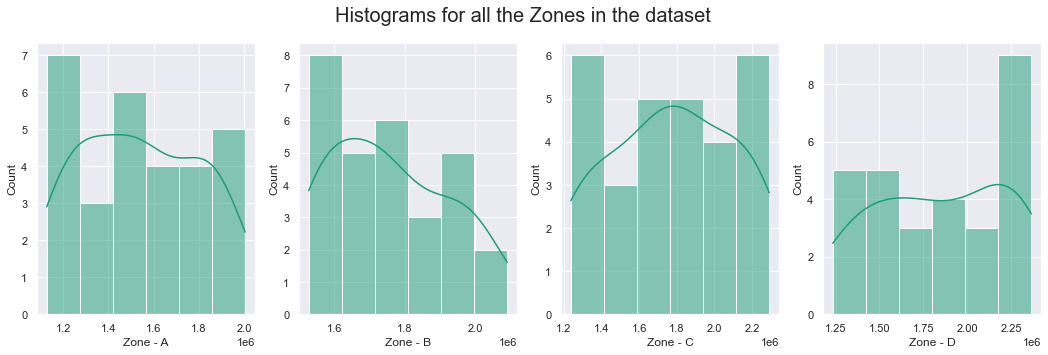

In [51]:
cols = df[['Zone - A','Zone - B','Zone - C','Zone - D']]
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
sns.set_theme(style="darkgrid", palette="Dark2")
fig.suptitle('Histograms for all the Zones in the dataset', fontsize=20)
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, ax=ax)

plt.show()

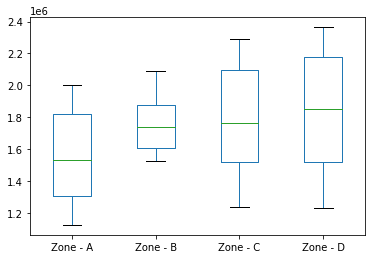

In [26]:
df.plot.box()
plt.show()

In [27]:
round(df['Zone - A'].mean())

1540493

In [28]:
round(df['Zone - B'].mean())

1755560

In [29]:
round(df['Zone - C'].mean())

1772871

In [30]:
round(df['Zone - D'].mean())

1842927

**● Total sales generated by all the zones for each month.**

In [97]:
column_list = list(df[['Zone - A','Zone - B','Zone - C','Zone - D']])
df1=df.assign(Total_Sale = df[column_list].sum(axis=1))
df1

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_Sale
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


In [ ]:
# Dropping an obsolete column
df.drop(columns=["Unnamed: 0"], inplace=True)
ad.head(5)

In [55]:
df["sum"] = df.sum(axis=1)

**● Check whether all the zones generate the same amount of sales.**

* Null hypothesis: All the zones generate the same amount of sales.
H0: μ1=μ2=μ3=μ4=μp


* Alternative hypothesis: All the zones generate different amount of sales.
H1: All μ are not equal

* To be able to determine F-critical value, we need:

    * Significance level
    
        df1 = k-1 (dfn — degrees of freedom nominator)
        
        df2 = N-k (dfd — degrees of freedom denominator)

where k = number of the groups, N = number of total observations.

In [52]:
from scipy.stats import f 
dfn = 3
dfd = 25
f_crit = f.ppf(1-0.05,dfn,dfd)
print('F-critical=',f_crit)

F-critical= 2.991240909549952


In [41]:
fvalue, pvalue = stats.f_oneway(df['Zone - A'], df['Zone - B'], df['Zone - C'],df['Zone - D'])
print('F-Statistic=',fvalue,'\nP-value=',pvalue)
if(pvalue<=0.05):
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

F-Statistic= 5.672056106843581 
P-value= 0.0011827601694503335
We reject null hypothesis


**Result**

* The amount of sales generated by the Zones are different or One of the Zone generates different amount of sales others.